In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv(r"/content/TATA CONSULTANCY SERVICES.CSV")
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,13-08-2002,39.750000,40.387501,38.875000,39.162498,27.891893,153576.0,39.47499967
1,14-08-2002,39.250000,39.250000,35.724998,36.462502,25.968939,822776.0,37.14583333
2,15-08-2002,36.462502,36.462502,36.462502,36.462502,25.968939,0.0,36.462502
3,16-08-2002,36.275002,38.000000,35.750000,36.375000,25.906618,811856.0,36.70833333
4,19-08-2002,36.674999,36.674999,35.137501,35.474998,25.265631,205880.0,35.76249933
...,...,...,...,...,...,...,...,...
5187,19-06-2023,3190.000000,3214.899902,3175.000000,3210.399902,3210.399902,1468186.0,3200.099935
5188,20-06-2023,3214.000000,3232.500000,3201.050049,3227.699951,3227.699951,1528452.0,3220.416667
5189,21-06-2023,3250.000000,3261.399902,3223.949951,3258.199951,3258.199951,1645987.0,3247.849935
5190,22-06-2023,3260.000000,3267.649902,3230.100098,3238.500000,3238.500000,1529603.0,3245.416667


In [52]:
df.dropna(inplace=True)

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

<ipython-input-53-0272355263af>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [56]:
df.Close=scaler.fit_transform(df[['Close']])

In [57]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'VWAP'],axis=1,inplace=True)

In [58]:
def sampling(sequence,n_steps):
  X,Y=list(),list()
  for i in range(len(sequence)):
    sample=i+n_steps
    if sample>len(sequence)-1:
      break
    x,y=sequence[i:sample],sequence[sample]
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)

In [59]:
n_steps=10
X,Y=sampling(df.Close.to_list(),n_steps)

In [60]:
for i in range(len(X)):
  print(X[i],Y[i])

Streaming output truncated to the last 5000 lines.
[0.16998752 0.17064646 0.16710074 0.1629651  0.16314082 0.16410099
 0.17106692 0.16913403 0.17524647 0.17579873] 0.17686558441115202
[0.17064646 0.16710074 0.1629651  0.16314082 0.16410099 0.17106692
 0.16913403 0.17524647 0.17579873 0.17686558] 0.17916873118419505
[0.16710074 0.1629651  0.16314082 0.16410099 0.17106692 0.16913403
 0.17524647 0.17579873 0.17686558 0.17916873] 0.17884868398387763
[0.1629651  0.16314082 0.16410099 0.17106692 0.16913403 0.17524647
 0.17579873 0.17686558 0.17916873 0.17884868] 0.17328848528951146
[0.16314082 0.16410099 0.17106692 0.16913403 0.17524647 0.17579873
 0.17686558 0.17916873 0.17884868 0.17328849] 0.17408548506396895
[0.16410099 0.17106692 0.16913403 0.17524647 0.17579873 0.17686558
 0.17916873 0.17884868 0.17328849 0.17408549] 0.17579246371154186
[0.17106692 0.16913403 0.17524647 0.17579873 0.17686558 0.17916873
 0.17884868 0.17328849 0.17408549 0.17579246] 0.17359599933860467
[0.16913403 0.1752

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [63]:
from keras import Sequential
from keras.layers import LSTM,Dense,Dropout

In [64]:
lstm=Sequential()
lstm.add(LSTM(100,activation="relu",input_shape=(10,1)))
lstm.add(Dense(1))
lstm.compile(optimizer="adam",loss="mse")
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:

lstm.fit(x_train,y_train,epochs=60,batch_size=20)

Epoch 1/60
207/207 [==============================] - 6s 9ms/step - loss: 0.0027
Epoch 2/60
207/207 [==============================] - 2s 9ms/step - loss: 4.2014e-05
Epoch 3/60
207/207 [==============================] - 2s 9ms/step - loss: 4.3914e-05
Epoch 4/60
207/207 [==============================] - 2s 10ms/step - loss: 4.5411e-05
Epoch 5/60
207/207 [==============================] - 3s 13ms/step - loss: 4.1327e-05
Epoch 6/60
207/207 [==============================] - 3s 13ms/step - loss: 4.5343e-05
Epoch 7/60
207/207 [==============================] - 2s 9ms/step - loss: 4.0233e-05
Epoch 8/60
207/207 [==============================] - 2s 9ms/step - loss: 4.3482e-05
Epoch 9/60
207/207 [==============================] - 2s 9ms/step - loss: 4.3625e-05
Epoch 10/60
207/207 [==============================] - 2s 10ms/step - loss: 4.4051e-05
Epoch 11/60
207/207 [==============================] - 2s 10ms/step - loss: 4.0823e-05
Epoch 12/60
207/207 [==============================] - 3s 13ms

In [66]:
train_predict=lstm.predict(x_train)
test_predict=lstm.predict(x_test)

33/33 [==============================] - 0s 6ms/step


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:

scaler.inverse_transform((mean_squared_error(y_train,train_predict)).reshape(-1,1))

array([[35.53156632]])

In [69]:
scaler.inverse_transform((mean_squared_error(y_test,test_predict)).reshape(-1,1))

array([[35.99772821]])

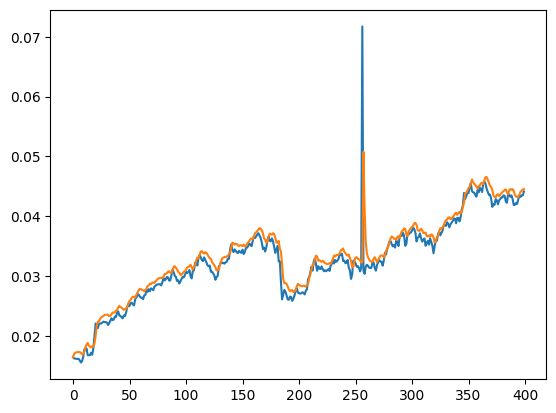

In [70]:
plt.plot(y_train[500:900])
plt.plot(train_predict[500:900])

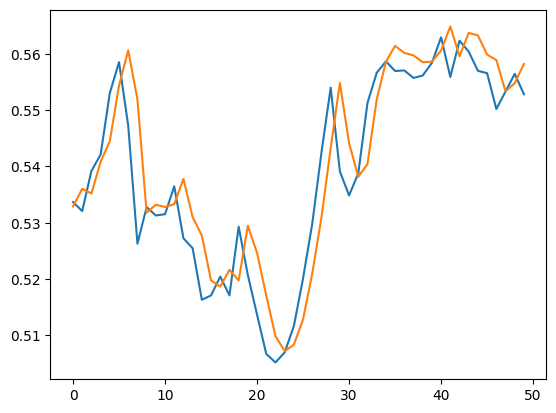

In [78]:
plt.plot(y_test[:50])
plt.plot(test_predict[:50])

In [72]:
test=np.array(df.Close.tail(10)).reshape(1,10)

In [74]:
lstm.predict(scaler.inverse_transform(test))

1/1 [==============================] - 0s 22ms/step


array([[3785.501]], dtype=float32)

In [77]:
scaler.inverse_transform(df.tail(10))

array([[3246.899902],
       [3243.699951],
       [3251.050049],
       [3216.300049],
       [3174.899902],
       [3210.399902],
       [3227.699951],
       [3258.199951],
       [3238.5     ],
       [3216.350098]])